## 4.10 Coding Etiquette & Excel Reporting (Part Two) 
Continue working on the ords_prods_cust_v2 dataframe, because the other notebook got too long 

In [1]:
#import libraries 
import numpy as np 
import pandas as pd
import os 
import seaborn as sns
import matplotlib.pyplot as plt 
import scipy 

In [2]:
#path to Instacart Basket Analysis 
path = r'/Users/libertyonia/Documents/Instacart Basket Analysis'

In [3]:
#import ords_prods_cust_v2 dataframe from the part one 
main_df = pd.read_pickle(os.path.join(path,'02 Data','Prepared Data','ords_prods_cust_version_two.pkl'))

In [4]:
#check the columns of the main_df 
main_df.columns.to_list()

['order_id',
 'user_id',
 'eval_set',
 'order_number',
 'order_day_of_week',
 'order_hour_of_day',
 'days_since_prior_order',
 'product_id',
 'add_to_cart_order',
 'reordered',
 'product_name',
 'aisle_id',
 'department_id',
 'prices',
 'price_range_loc',
 'busiest_day',
 'busiest_days',
 'busiest_period_of_day',
 'max_order',
 'loyalty_flag',
 'average_spending',
 'spending_flag',
 'median_dspo',
 'order_behavior',
 'First Name',
 'Surname',
 'Gender',
 'STATE',
 'Age',
 'date_joined',
 'n_dependants',
 'fam_status',
 'income',
 '_merge',
 'Region',
 'Customer Activity',
 'age_status',
 'family_status',
 'age_family',
 'department_name',
 'age_dependants_fam']

In [5]:
main_df.head(5)

,order_id,user_id,eval_set,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,fam_status,income,_merge,Region,Customer Activity,age_status,family_status,age_family,department_name,age_dependants_fam
0,2398795,1,prior,2,3,7,15.0,196,1,1,...,married,40423,both,South,High-activity Customer,adult,w/ dependants,adult w/ dependants,beverages,adult w/ dependants (married)
1,473747,1,prior,3,3,12,21.0,196,1,1,...,married,40423,both,South,High-activity Customer,adult,w/ dependants,adult w/ dependants,beverages,adult w/ dependants (married)
2,2254736,1,prior,4,4,7,29.0,196,1,1,...,married,40423,both,South,High-activity Customer,adult,w/ dependants,adult w/ dependants,beverages,adult w/ dependants (married)
3,431534,1,prior,5,4,15,28.0,196,1,1,...,married,40423,both,South,High-activity Customer,adult,w/ dependants,adult w/ dependants,beverages,adult w/ dependants (married)
4,3367565,1,prior,6,2,7,19.0,196,1,1,...,married,40423,both,South,High-activity Customer,adult,w/ dependants,adult w/ dependants,beverages,adult w/ dependants (married)


# Create a subset of the df_main dataframe 

In [6]:
#randomily assign numbers between 0 - 1 using the main_df length
np.random.seed(4)
dev = np.random.rand(len(main_df)) <= 0.7 
small_df = main_df[~dev]

In [7]:
#check the frequency of age_family column 
small_df['age_family'].value_counts(dropna = False)

adult w/o dependants      3163122
adult w/ dependants       3155521
elderly w/ dependants     1151004
elderly w/o dependants    1130108
Name: age_family, dtype: int64

In [8]:
#small dataframe containing only 'adults w/o dependants'
small_df_adults_wo = small_df[small_df['age_family'] == 'adult w/o dependants']

In [9]:
#check number of rows and columns in the small_df dataframe 
small_df_adults_wo.shape

(3163122, 41)

In [10]:
#small dataframe containing only 'adults w/ dependants'
small_df_adults_w = small_df[small_df['age_family'] == 'adult w/ dependants']

In [11]:
#check shape
small_df_adults_w.shape

(3155521, 41)

In [12]:
#small dataframe containing only 'elderly w/o dependants'
small_df_elderly_wo = small_df[small_df['age_family'] == 'elderly w/o dependants']

In [13]:
#check shape
small_df_elderly_wo.shape

(1130108, 41)

In [14]:
#small dataframe containing only 'elderly w/ dependants'
small_df_elderly_w = small_df[small_df['age_family'] == 'elderly w/ dependants']

In [15]:
#check shape 
small_df_elderly_w.shape

(1151004, 41)

# During the day, when are people making orders in each profile?

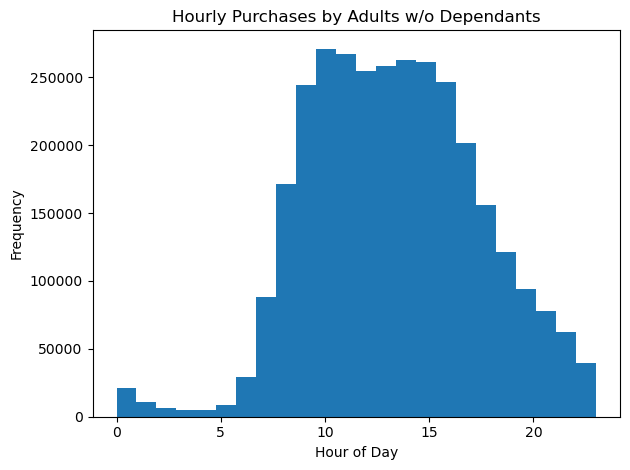

In [16]:
#histogram of small_df_adults_wo
small_df_adults_wo_hist = small_df_adults_wo['order_hour_of_day'].plot.hist(bins = 24)
small_df_adults_wo_hist.set_title('Hourly Purchases by Adults w/o Dependants')
small_df_adults_wo_hist.set_xlabel('Hour of Day')
plt.tight_layout()

In [17]:
#export small_df_adults_wo_hist
small_df_adults_wo_hist.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','small_df_adults_wo_hist.png'))

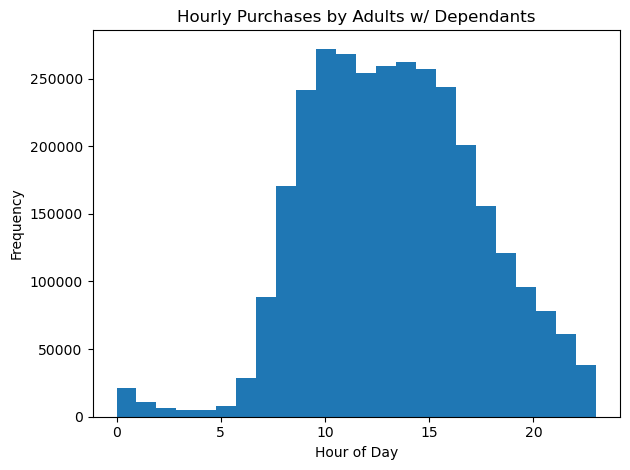

In [18]:
#histogram of small_df_adults_w
small_df_adults_w_hist = small_df_adults_w['order_hour_of_day'].plot.hist(bins = 24)
small_df_adults_w_hist.set_title('Hourly Purchases by Adults w/ Dependants')
small_df_adults_w_hist.set_xlabel('Hour of Day')
plt.tight_layout()

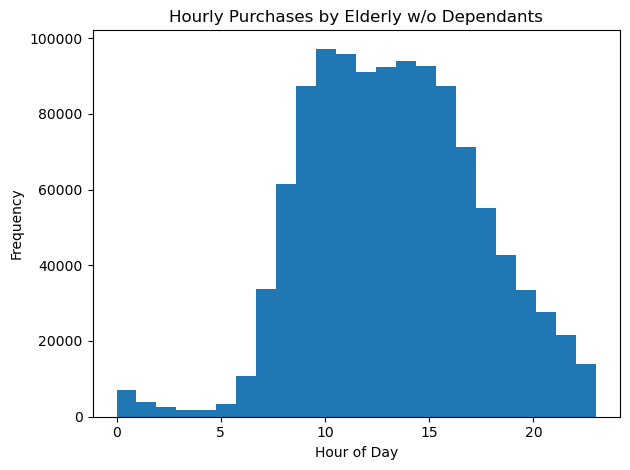

In [19]:
#histogram of small_df_elderly_wo
small_df_elderly_wo_hist = small_df_elderly_wo['order_hour_of_day'].plot.hist(bins = 24)
small_df_elderly_wo_hist.set_title('Hourly Purchases by Elderly w/o Dependants')
small_df_elderly_wo_hist.set_xlabel('Hour of Day')
plt.tight_layout()

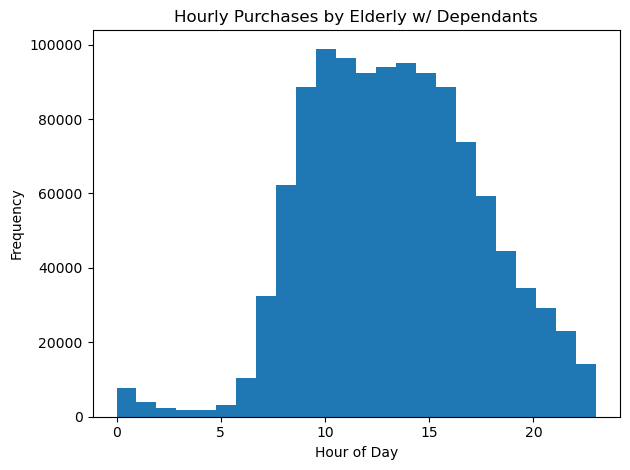

In [20]:
#histogram of small_df_elderly_w
small_df_elderly_w_hist = small_df_elderly_w['order_hour_of_day'].plot.hist(bins = 24)
small_df_elderly_w_hist.set_title('Hourly Purchases by Elderly w/ Dependants')
small_df_elderly_w_hist.set_xlabel('Hour of Day')
plt.tight_layout()

In [21]:
#export small_df_adults_w_hist
small_df_adults_w_hist.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','small_df_adults_w_hist.png'))

In [22]:
#export small_df_elderly_wo_hist
small_df_elderly_wo_hist.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','small_df_elderly_wo_hist.png'))

In [23]:
#export small_df_elderly_w_hist
small_df_elderly_w_hist.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','small_df_elderly_w_hist.png'))

# During the day, when are people making ords in each region?

In [24]:
#count the frequency of Region column 
small_df['Region'].value_counts(dropna = False)

South        2862744
West         2202699
Midwest      2015007
Northeast    1519305
Name: Region, dtype: int64

In [25]:
#small_df containing on entries under West region 
small_df_west = small_df[small_df['Region'] == 'West']

In [26]:
#check columns and rows 
small_df_west.shape

(2202699, 41)

In [27]:
#small_df containing on entries under South region 
small_df_south = small_df[small_df['Region'] == 'South']

In [28]:
small_df_south.shape

(2862744, 41)

In [29]:
#small_df containing on entries under Midwest region 
small_df_midwest = small_df[small_df['Region'] == 'Midwest']

In [30]:
#check columns and rows 
small_df_midwest.shape

(2015007, 41)

In [31]:
#small_df containing on entries under Northeast region 
small_df_northeast = small_df[small_df['Region'] == 'Northeast']

In [32]:
#check columns and rows 
small_df_northeast.shape

(1519305, 41)

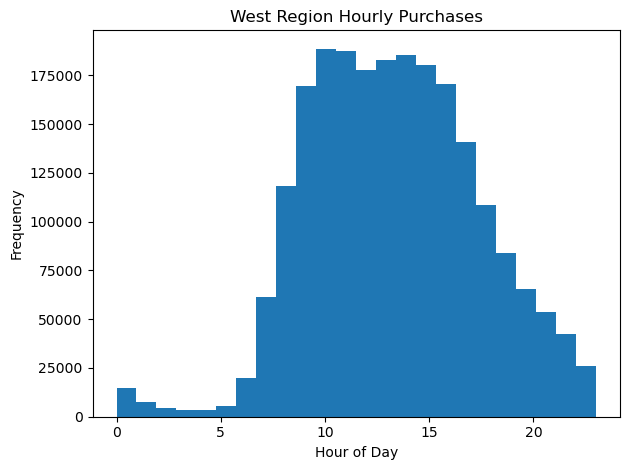

In [33]:
#plot histogram of the small_df_west 
small_df_west_hist = small_df_west['order_hour_of_day'].plot.hist(bins=24)
small_df_west_hist.set_title('West Region Hourly Purchases')
small_df_west_hist.set_xlabel('Hour of Day')
plt.tight_layout()

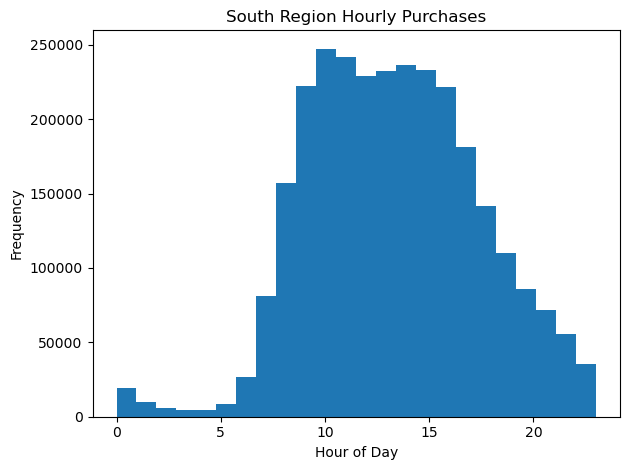

In [34]:
#plot histogram of the small_df_south
small_df_south_hist = small_df_south['order_hour_of_day'].plot.hist(bins=24)
small_df_south_hist.set_title('South Region Hourly Purchases')
small_df_south_hist.set_xlabel('Hour of Day')
plt.tight_layout()

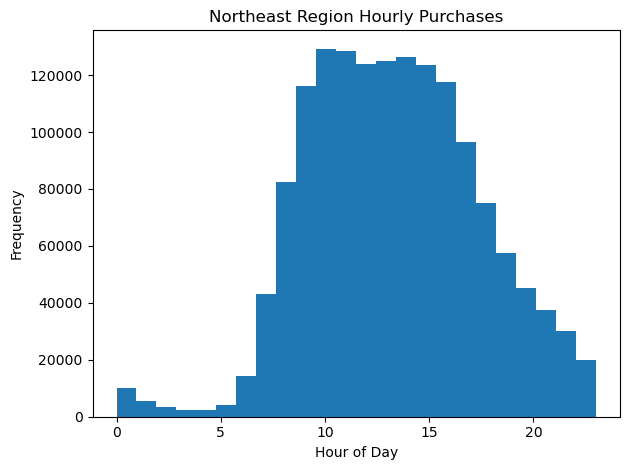

In [35]:
#plot histogram of the small_df_northeast
small_df_northeast_hist = small_df_northeast['order_hour_of_day'].plot.hist(bins=24)
small_df_northeast_hist.set_title('Northeast Region Hourly Purchases')
small_df_northeast_hist.set_xlabel('Hour of Day')
plt.tight_layout()

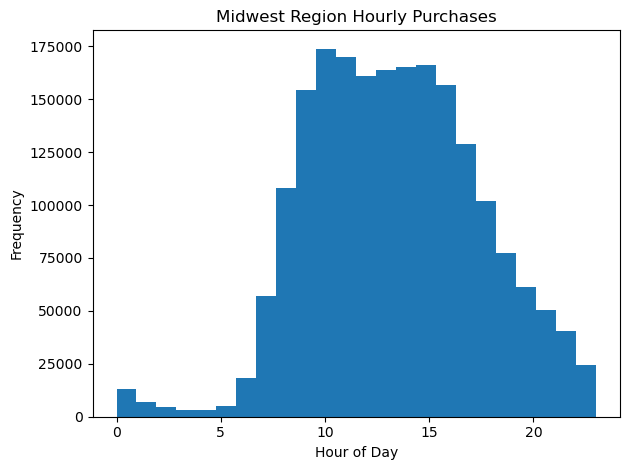

In [36]:
#plot histogram of the small_df_midwest
small_df_midwest_hist = small_df_midwest['order_hour_of_day'].plot.hist(bins=24)
small_df_midwest_hist.set_title('Midwest Region Hourly Purchases')
small_df_midwest_hist.set_xlabel('Hour of Day')
plt.tight_layout()

In [37]:
#export small_df_west_hist
small_df_west_hist.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','small_df_west_hist.png'))


In [38]:
#export small_df_midwest_hist
small_df_midwest_hist.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','small_df_midwest_hist.png'))


In [39]:
#export small_df_northeast_hist
small_df_northeast_hist.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','small_df_northeast_hist.png'))


In [40]:
#export small_df_south_hist
small_df_south_hist.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','small_df_south_hist.png'))


# During the week, when are people making orders in each region?

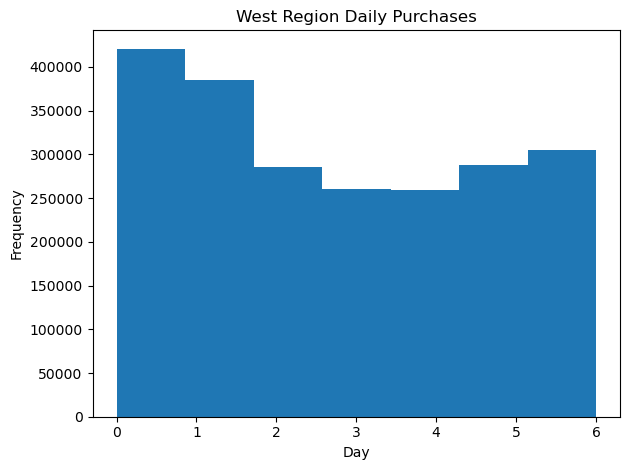

In [41]:
#plot histogram of the small_df_west 
small_df_west_hist_day = small_df_west['order_day_of_week'].plot.hist(bins=7)
small_df_west_hist_day.set_title('West Region Daily Purchases')
small_df_west_hist_day.set_xlabel('Day')
plt.tight_layout()

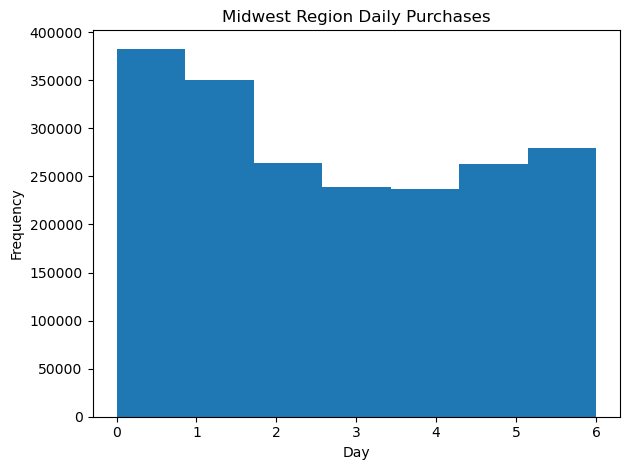

In [42]:
#plot histogram of the small_df_midwest 
small_df_midwest_hist_day = small_df_midwest['order_day_of_week'].plot.hist(bins=7)
small_df_midwest_hist_day.set_title('Midwest Region Daily Purchases')
small_df_midwest_hist_day.set_xlabel('Day')
plt.tight_layout()

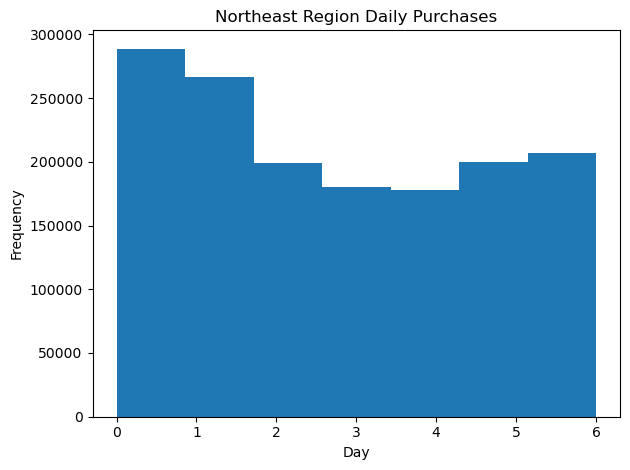

In [43]:
#plot histogram of the small_df_northeast 
small_df_northeast_hist_day = small_df_northeast['order_day_of_week'].plot.hist(bins=7)
small_df_northeast_hist_day.set_title('Northeast Region Daily Purchases')
small_df_northeast_hist_day.set_xlabel('Day')
plt.tight_layout()

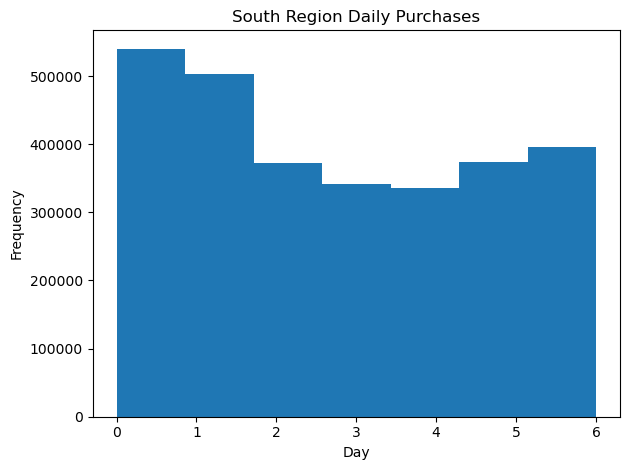

In [44]:
#plot histogram of the small_df_south
small_df_south_hist_day = small_df_south['order_day_of_week'].plot.hist(bins=7)
small_df_south_hist_day.set_title('South Region Daily Purchases')
small_df_south_hist_day.set_xlabel('Day')
plt.tight_layout()

In [45]:
#export small_df_west_hist_day
small_df_west_hist_day.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','small_df_west_hist_day.png'))


In [46]:
#export small_df_south_hist_day
small_df_south_hist_day.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','small_df_south_hist_day.png'))


In [47]:
#export small_df_midwest_hist_day
small_df_midwest_hist_day.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','small_df_midwest_hist_day.png'))


In [48]:
#export small_df_northeast_hist_day
small_df_northeast_hist_day.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','small_df_northeast_hist_day.png'))


# How does product price affect purchasing behaviours?

Text(0.5, 1.0, 'West')

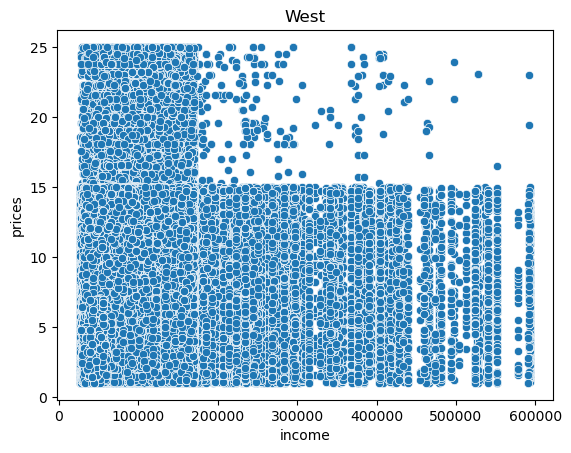

In [49]:
#scatterplot income vs product price 
#groupby and aggregate by region 
scatter_west = sns.scatterplot(x = 'income', y = 'prices',data = small_df_west)
scatter_west.set_title('West')

Text(0.5, 1.0, 'Midwest')

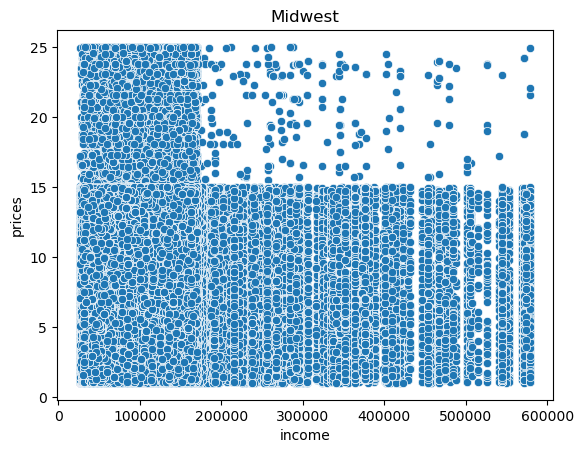

In [50]:
#scatter income and prices of the Midwest
scatter_midwest = sns.scatterplot(x = 'income', y = 'prices',data = small_df_midwest)
scatter_midwest.set_title('Midwest')

Text(0.5, 1.0, 'South')

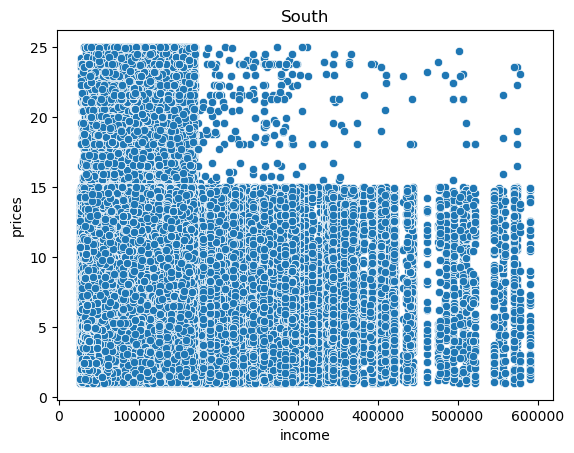

In [51]:
#scatter income and prices of the South
scatter_south = sns.scatterplot(x = 'income', y = 'prices',data = small_df_south)
scatter_south.set_title('South')

Text(0.5, 1.0, 'Northeast')

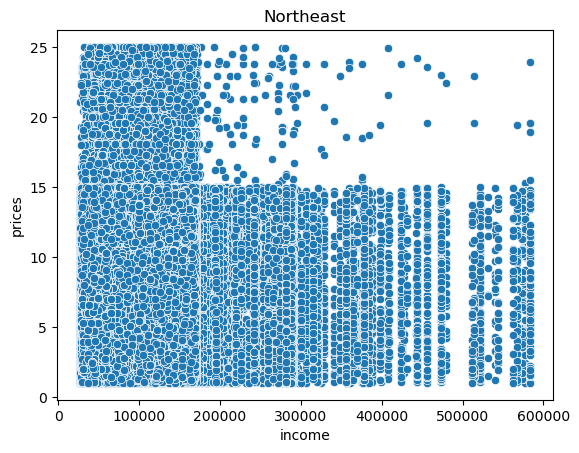

In [52]:
#scatter income and prices of the Northeast
scatter_northeast = sns.scatterplot(x = 'income', y = 'prices',data = small_df_northeast)
scatter_northeast.set_title('Northeast')

In [53]:
#export scatter_northeast
scatter_northeast.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','scatter_northeast.png'))


In [54]:
#export scatter_west
scatter_west.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','scatter_west.png'))


In [55]:
#export scatter_midwest
scatter_midwest.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','scatter_midwest.png'))


In [56]:
#export scatter_south
scatter_south.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','scatter_south.png'))


# How is brand loyalty per region?

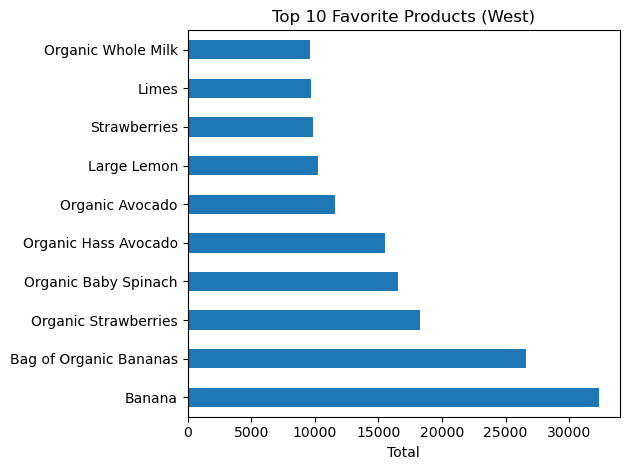

In [57]:
#Top 10 foods in the West region
top_10_west = small_df_west['product_name'].value_counts().head(10).plot.barh()
plt.tight_layout()
top_10_west.set_title('Top 10 Favorite Products (West)')
top_10_west.set_xlabel('Total')
plt.tight_layout()

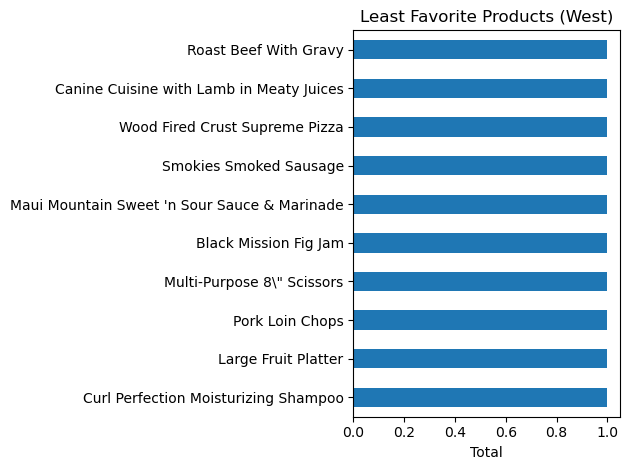

In [58]:
#Least liked foods in the West region
bottom_10_west = small_df_west['product_name'].value_counts().sort_values(ascending=True).head(10).plot.barh()
plt.tight_layout()
bottom_10_west.set_title('Least Favorite Products (West)')
bottom_10_west.set_xlabel('Total')
plt.tight_layout()

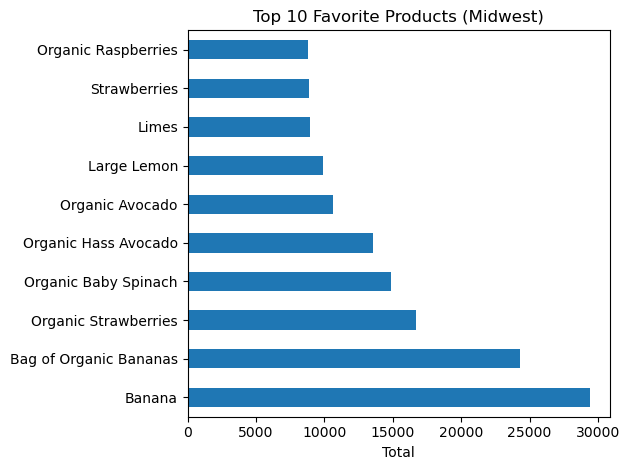

In [59]:
#Top 10 foods in the Midwest region
top_10_midwest = small_df_midwest['product_name'].value_counts().head(10).plot.barh()
plt.tight_layout()
top_10_midwest.set_title('Top 10 Favorite Products (Midwest)')
top_10_midwest.set_xlabel('Total')
plt.tight_layout()

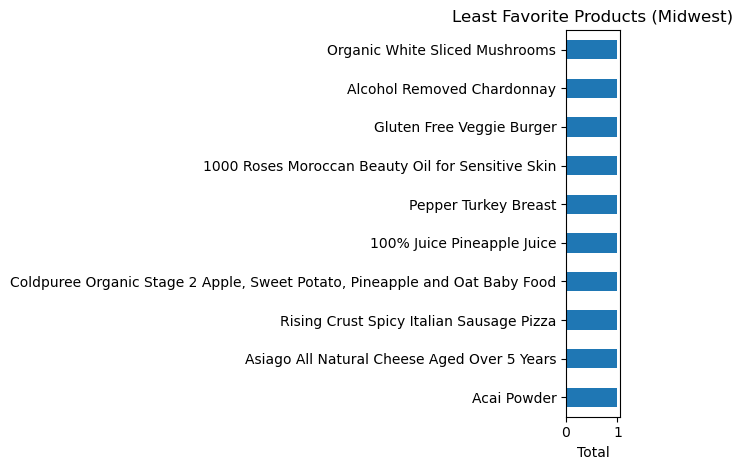

In [60]:
#Least liked foods in the Midwest region
bottom_10_midwest = small_df_midwest['product_name'].value_counts().sort_values(ascending=True).head(10).plot.barh()
bottom_10_midwest.set_title('Least Favorite Products (Midwest)')
bottom_10_midwest.set_xlabel('Total')
plt.tight_layout()

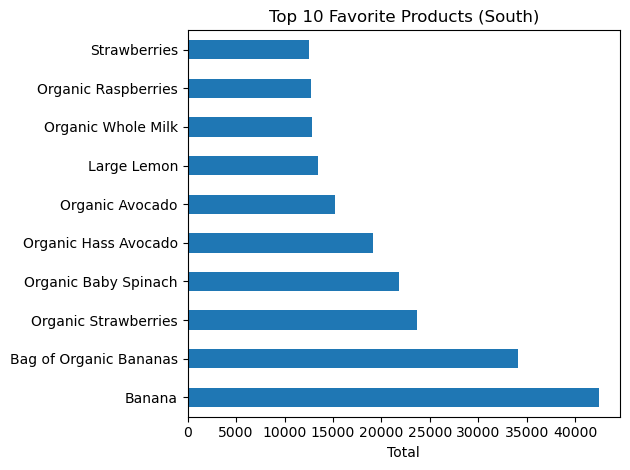

In [61]:
#Top 10 foods in the South region
top_10_south = small_df_south['product_name'].value_counts().head(10).plot.barh()
plt.tight_layout()
top_10_south.set_title('Top 10 Favorite Products (South)')
top_10_south.set_xlabel('Total')
plt.tight_layout()

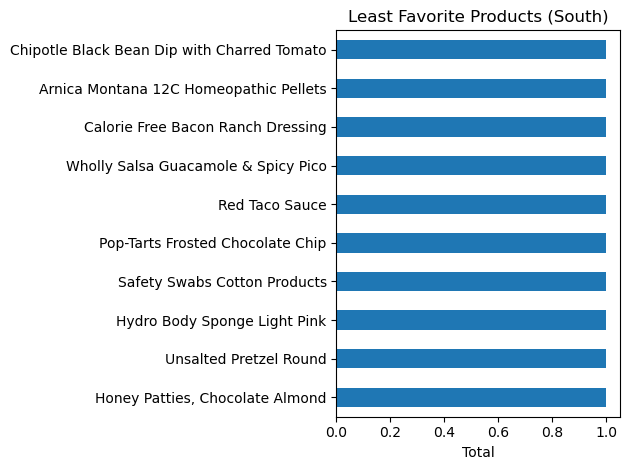

In [62]:
#Least liked foods in the South region
bottom_10_south = small_df_south['product_name'].value_counts().sort_values(ascending=True).head(10).plot.barh()
bottom_10_south.set_title('Least Favorite Products (South)')
bottom_10_south.set_xlabel('Total')
plt.tight_layout()

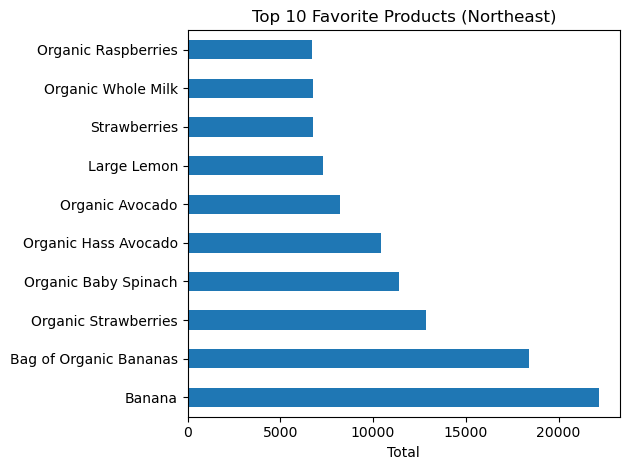

In [63]:
#Top 10 foods in the Northeast region
top_10_northeast = small_df_northeast['product_name'].value_counts().head(10).plot.barh()
plt.tight_layout()
top_10_northeast.set_title('Top 10 Favorite Products (Northeast)')
top_10_northeast.set_xlabel('Total')
plt.tight_layout()

Text(0.5, 0, 'Total')

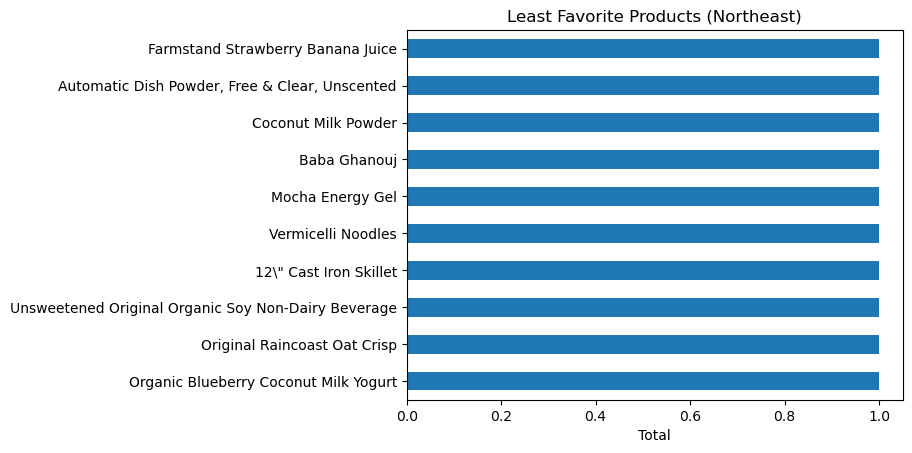

In [64]:
#Least liked foods in the Northeast region
bottom_10_northeast = small_df_northeast['product_name'].value_counts().sort_values(ascending=True).head(10).plot.barh()
bottom_10_northeast.set_title('Least Favorite Products (Northeast)')
bottom_10_northeast.set_xlabel('Total')

In [65]:
#export top_10_northeast
top_10_northeast.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','top_10_northeast.png'))


In [66]:
#export top_10_west
top_10_west.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','top_10_west.png'))


In [67]:
#export top_10_midwest
top_10_midwest.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','top_10_midwest.png'))


In [68]:
#export top_10_south
top_10_south.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','top_10_south.png'))


# What’s the distribution among users in regards to their brand loyalty (i.e., how often do they return to Instacart)?

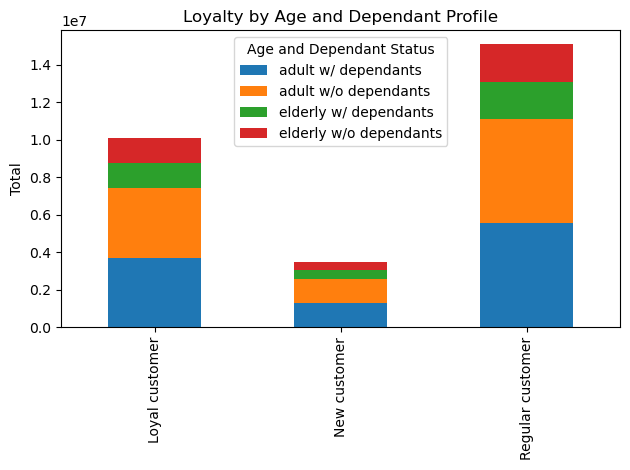

In [69]:
#bar chart of loyal customers by customer profile 
age_fam_loyal = pd.crosstab(main_df['loyalty_flag'], main_df['age_family'],dropna=False)
age_fam_loyal = age_fam_loyal.plot.bar(stacked = True)
age_fam_loyal.set_ylabel('Total')
age_fam_loyal.set_title('Loyalty by Age and Dependant Profile')
plt.legend(title='Age and Dependant Status')
plt.ylabel('Total')
plt.xlabel('')
plt.tight_layout()

In [70]:
#export age_fam_loyal
age_fam_loyal.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','age_fam_loyal.png'))

# Are there differences in ordering habits based on a customer’s loyalty status?

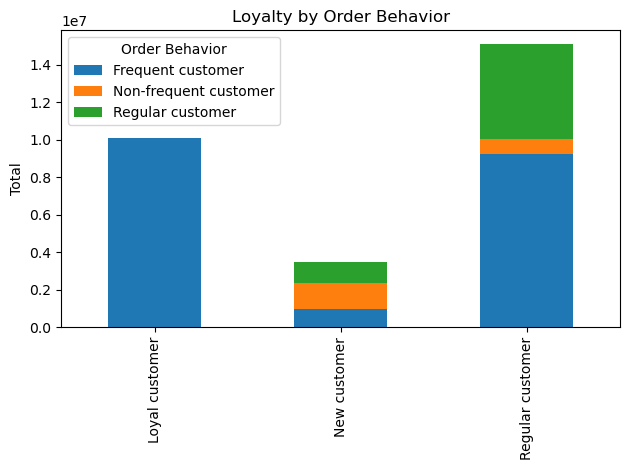

In [71]:
#bar chart of loyal customers by order behavior
order_loyal = pd.crosstab(main_df['loyalty_flag'],main_df['order_behavior'],dropna=False)
order_loyal = order_loyal.plot.bar(stacked = True)
order_loyal.set_xlabel('')
order_loyal.set_ylabel('Total')
order_loyal.set_title('Loyalty by Order Behavior')
plt.legend(title='Order Behavior')
plt.tight_layout()

In [72]:
#export loyalty flag and order behavior chart 
order_loyal.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','loyal_behavior.png'))

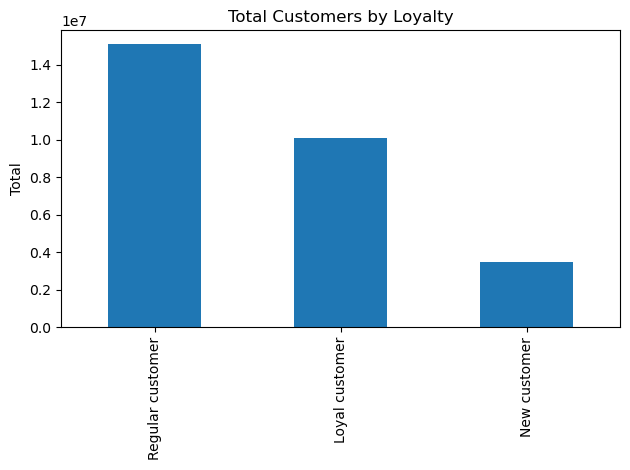

In [73]:
#Count the total amount of cusotmers depending on loyalty 
total_loyalty = main_df['loyalty_flag'].value_counts().plot.bar()
total_loyalty.set_title('Total Customers by Loyalty')
total_loyalty.set_ylabel('Total')
plt.tight_layout()

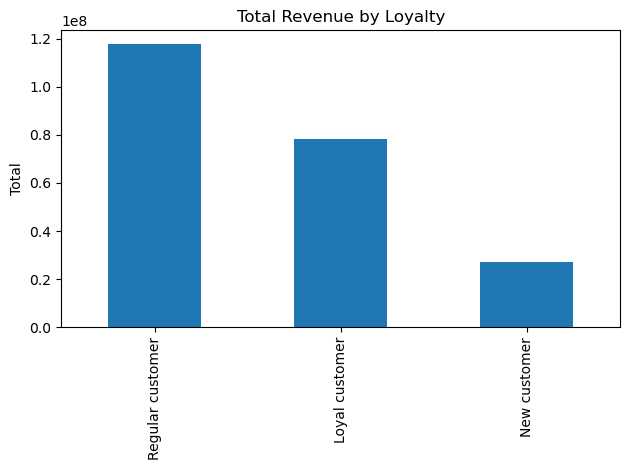

In [74]:
#Total spending by Loyal, Regular, and New Customers 
loyalty_revenue = main_df.groupby('loyalty_flag')['prices'].sum().sort_values(ascending=False)
loyalty_revenue = loyalty_revenue.plot(kind='bar')
plt.title('Total Revenue by Loyalty')
plt.ylabel('Total')
plt.xlabel('')
plt.tight_layout()

In [75]:
#export loyalty_revenue
loyalty_revenue.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','loyalty_revenue.png'))